In [1]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import glob

In [2]:
time = 0 
time_list = []
area_list = []
path = "python/scratch/new/*.*"

In [18]:
for files in glob.glob(path):
    img = io.imread(files, as_gray=True)
    entr_img = entropy(img, disk(15))
    thresh = threshold_otsu(entr_img)
    binary = entr_img <= thresh
    scratch_area = np.sum(binary==1)
    time += 1
    time_list.append(time)
    area_list.append(scratch_area)

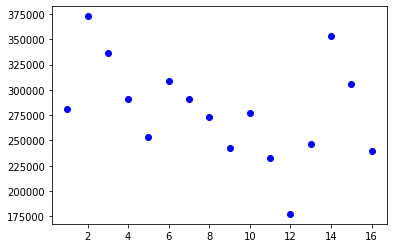

In [19]:
plt.plot(time_list, area_list, 'bo')

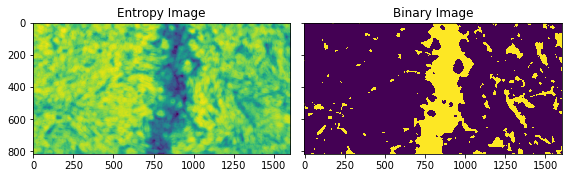

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,8))

ax = axes.ravel()

ax[0].imshow(entr_img)
ax[0].set_title("Entropy Image")

ax[1].imshow(binary)
ax[1].set_title("Binary Image")
    
plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import linregress

In [22]:
slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)

In [23]:
print("y = ", slope, "x + ", intercept)
print("R\N{SUPERSCRIPT TWO} : ", r_value**2)

y =  -3950.8073529411763 x +  313757.3
R² :  0.14531494285007182
